In [29]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px

In [3]:
%matplotlib inline
sns.set_theme(style="darkgrid")
plt.rcParams['figure.figsize'] = (18, 10)
plt.rcParams['axes.titlesize'] = 16

## Database Overview

This database contains hundreds of thousands of reports damage caused by birds to aircraft over the years in the United States. Most reports contain detailed information about the incident, that can be interesting to explore.

In [32]:
typeSpecification = {"Aircraft Model": str, "Engine Model": str, "Engine3 Position": str, "Engine1 Position": str}
df = pd.read_csv('../database/aircraft_wildlife_strikes.zip', compression='zip', dtype=typeSpecification)
df.head(10)

,Record ID,Incident Year,Incident Month,Incident Day,Operator ID,Operator,Aircraft,Aircraft Type,Aircraft Make,Aircraft Model,...,Fuselage Strike,Fuselage Damage,Landing Gear Strike,Landing Gear Damage,Tail Strike,Tail Damage,Lights Strike,Lights Damage,Other Strike,Other Damage
0,127128,1990,1,1,DAL,DELTA AIR LINES,B-757-200,A,148,26,...,0,0,0,0,1,1,0,0,0,0
1,129779,1990,1,1,HAL,HAWAIIAN AIR,DC-9,A,583,90,...,0,0,0,0,0,0,0,0,1,0
2,129780,1990,1,2,UNK,UNKNOWN,UNKNOWN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
3,2258,1990,1,3,MIL,MILITARY,A-10A,A,345,NaN,...,0,0,0,0,0,0,0,0,0,0
4,2257,1990,1,3,MIL,MILITARY,F-16,A,561,NaN,...,0,0,0,0,0,0,0,0,0,0
5,129734,1990,1,4,HAL,HAWAIIAN AIR,DC-9,A,583,90,...,0,0,0,0,0,0,0,0,1,0
6,129735,1990,1,5,UNK,UNKNOWN,UNKNOWN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
7,129736,1990,1,5,UNK,UNKNOWN,UNKNOWN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
8,129737,1990,1,6,UNK,UNKNOWN,UNKNOWN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
9,127848,1990,1,7,EME,METRO EXPRESS,DHC8 DASH 8,A,303,10,...,0,0,0,0,0,0,0,0,0,0


There is a lot of information on this database, so we need to know more about the data. Taking a look at the columns can give some ideas. It is worth noting that many columns have `null` values, which should be considered in any experiments.

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174104 entries, 0 to 174103
Data columns (total 66 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Record ID             174104 non-null  int64  
 1   Incident Year         174104 non-null  int64  
 2   Incident Month        174104 non-null  int64  
 3   Incident Day          174104 non-null  int64  
 4   Operator ID           174104 non-null  object 
 5   Operator              174104 non-null  object 
 6   Aircraft              174104 non-null  object 
 7   Aircraft Type         133074 non-null  object 
 8   Aircraft Make         131051 non-null  object 
 9   Aircraft Model        122439 non-null  object 
 10  Aircraft Mass         127320 non-null  float64
 11  Engine Make           123434 non-null  float64
 12  Engine Model          121988 non-null  object 
 13  Engines               127342 non-null  float64
 14  Engine Type           127282 non-null  object 
 15  

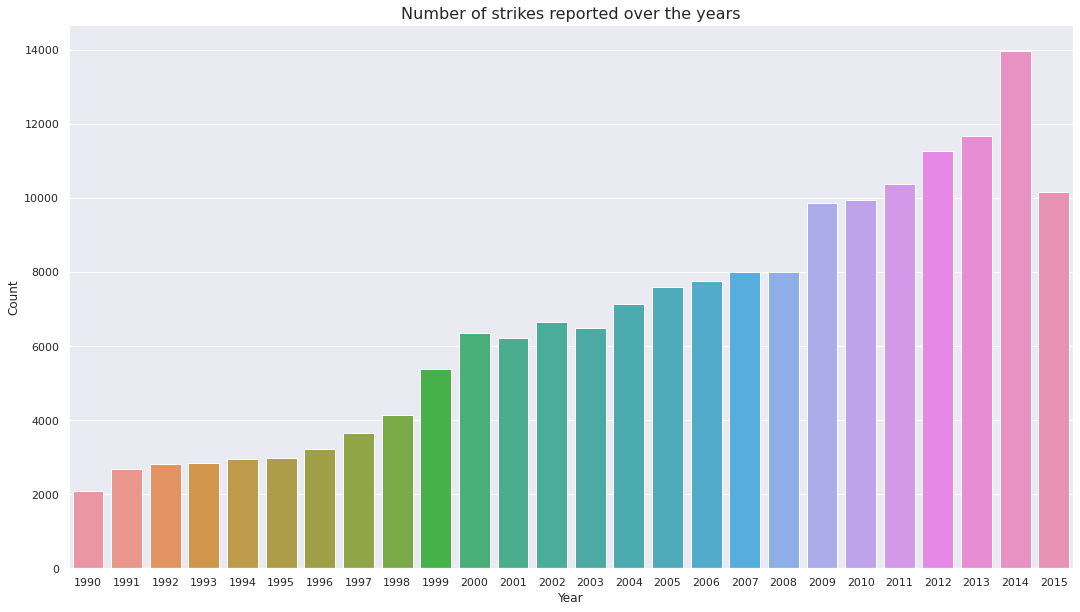

In [6]:
incidents_by_years = (df.groupby('Incident Year')
                      .agg({'Record ID': 'count'}).reset_index()
                      .rename(columns={'Record ID': 'Count', 'Incident Year': 'Year'}))
sns.barplot(data=incidents_by_years, x='Year', y='Count')
plt.title('Number of strikes reported over the years')
plt.show()

We can observe a predominant increase in the number of reports over the years. Looking more carefully to the records of 2015, we note that there is no incident reported since `October`, which strongly indicates that the data collected since then wasn't included in the database.

In [7]:
df.query("`Incident Year` == 2015")["Incident Month"].unique()

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

### Which Bird Species are the most common in accidents?

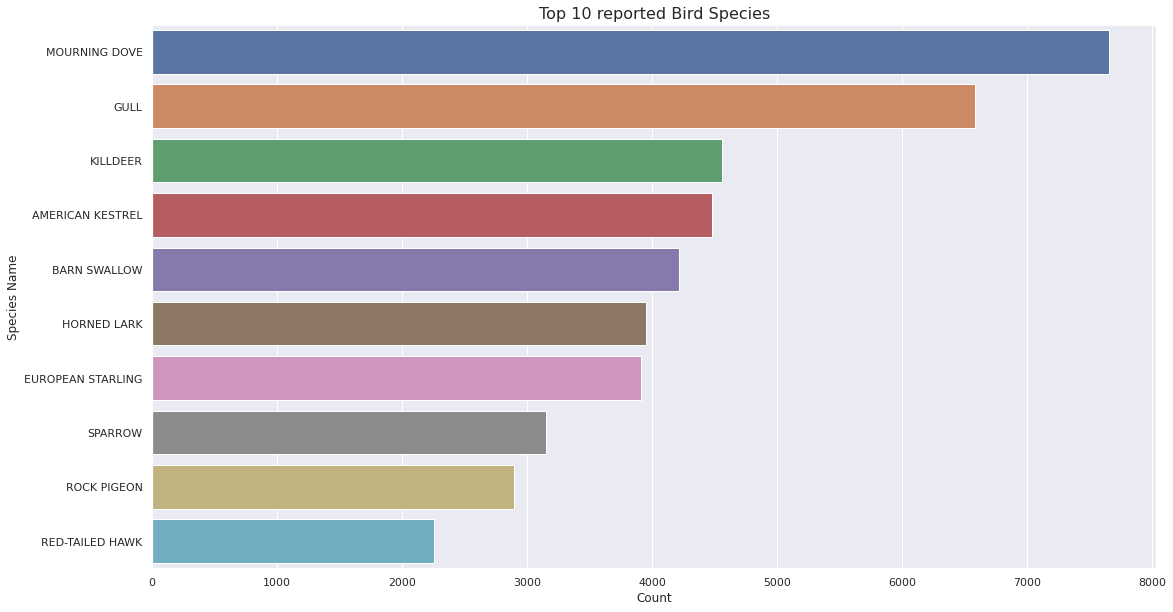

In [8]:
# Grouping accidents by Species, ordered by number of reports
birdSpecies: pd.DataFrame = df.groupby('Species ID').agg({'Record ID': 'count', 'Species Name': 'unique'}).sort_values('Record ID', ascending=False).reset_index()
# Grabbing the Name of the species
birdSpecies['Species Name']: pd.Series = birdSpecies['Species Name'].apply(lambda x: x[0])
# Removing Unknown Birds
birdSpecies.dropna(inplace=True)
birdSpecies: pd.DataFrame = birdSpecies[birdSpecies['Species Name'].str.startswith('UNKNOWN') == False]
# Plotting
birdSpecies.rename(columns={'Record ID': 'Count'}, inplace=True)
sns.barplot(data=birdSpecies[:10], y='Species Name', x='Count')
plt.title('Top 10 reported Bird Species')
plt.show()

In [9]:
birdSpecies["Relative Percentage"]: pd.Series = birdSpecies["Count"] / int(birdSpecies[birdSpecies["Species Name"] == "MOURNING DOVE"]["Count"])
birdSpecies["Absolute Percentage"]: pd.Series = birdSpecies["Count"] / birdSpecies["Count"].sum()
birdSpecies.head(10)

,Species ID,Count,Species Name,Relative Percentage,Absolute Percentage
2,O2205,7653,MOURNING DOVE,1.000000,0.082089
3,NE1,6580,GULL,0.859794,0.070580
5,N5111,4562,KILLDEER,0.596106,0.048934
6,K5114,4476,AMERICAN KESTREL,0.584869,0.048011
7,YI005,4215,BARN SWALLOW,0.550764,0.045212
8,YH004,3952,HORNED LARK,0.516399,0.042391
9,YL001,3915,EUROPEAN STARLING,0.511564,0.041994
10,ZX3,3152,SPARROW,0.411865,0.033810
11,O2111,2893,ROCK PIGEON,0.378022,0.031031
13,K3302,2254,RED-TAILED HAWK,0.294525,0.024177


Mourning dove is the most common bird reported by a wide margin, being ~14.1% more common than the gull and ~40.4% more common than the killdeer. However, it is present only on 8% of reports, meaning there are other species that are not as invovlved in many accidents as the mourning dove, but they are still relevant in data analysis.

### In general, what aircraft parts are more affected?

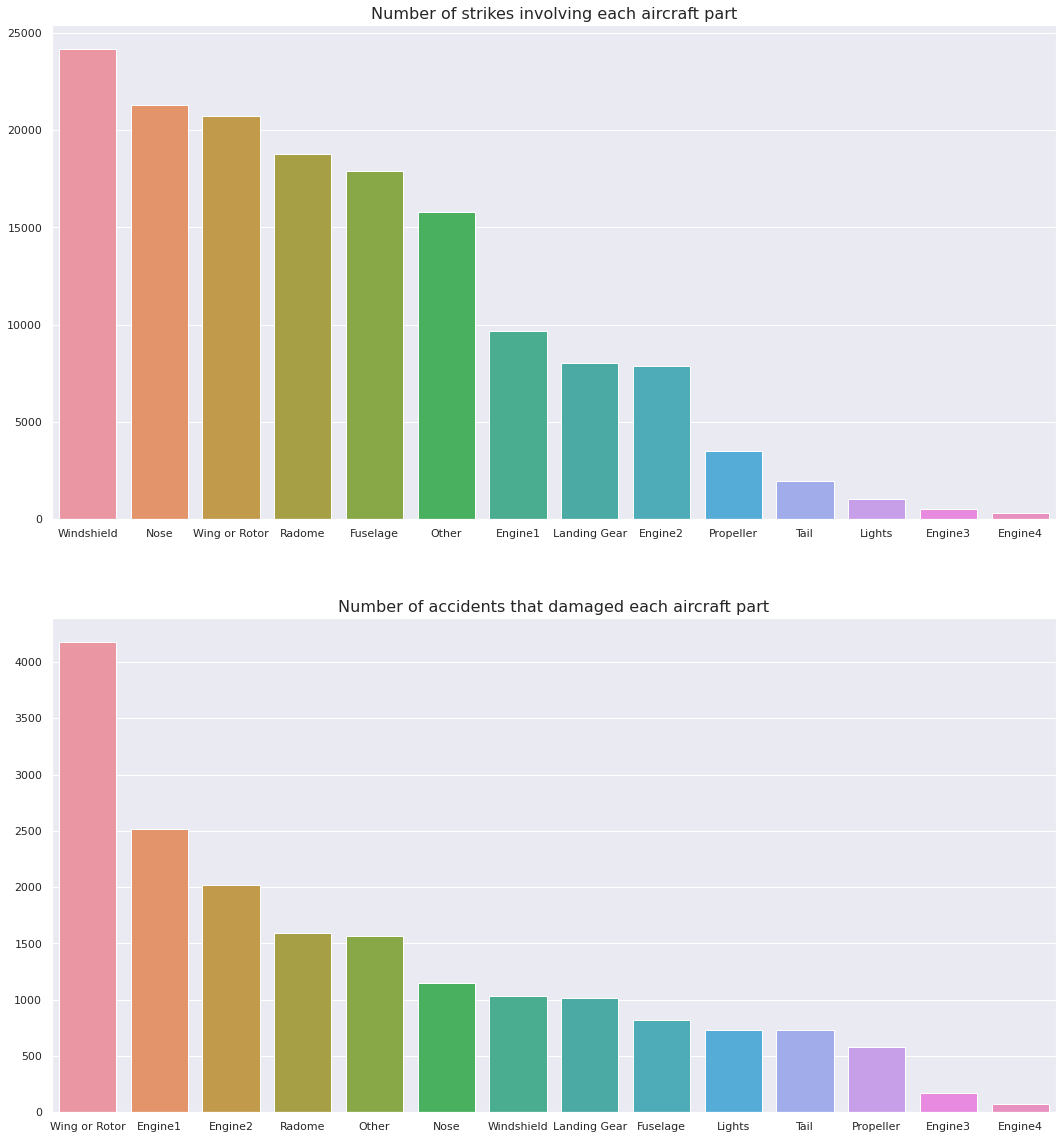

In [10]:
# Selecting the data about aircraft parts
aircraft_parts =  ["Radome", "Windshield", "Nose", "Engine1", "Engine2", "Engine3", "Engine4", "Propeller", "Wing or Rotor", "Fuselage", "Landing Gear", "Tail", "Lights", "Other"]
aircraft_strikes = list(map(lambda x: x + " Strike", aircraft_parts))
aircraft_damages = list(map(lambda x: x + " Damage", aircraft_parts))

damages_count = [ np.count_nonzero(df[aircraft_damages[i]].values) for i in range(len(aircraft_parts))]
strikes_count = [ np.count_nonzero(df[aircraft_strikes[i]].values) for i in range(len(aircraft_parts))]

# Ordering aircraft parts
def bubble_sort(x, labels):
    x = x.copy()
    labels = labels.copy()
    n = len(x)
    for i in range(n):
        for j in range(i, n):
            if x[i] < x[j]:
                x[j], x[i] = x[i], x[j]
                labels[j], labels[i] = labels[i], labels[j]
    return x, labels

damages_count, damages_order = bubble_sort(damages_count, aircraft_parts)
strikes_count, strikes_order = bubble_sort(strikes_count, aircraft_parts)

fig, ax = plt.subplots(2, 1, figsize = (18, 20))

sns.barplot(x = strikes_order, y = strikes_count, ax = ax[0])
sns.barplot(x = damages_order, y = damages_count, ax = ax[1])

ax[0].set(title="Number of strikes involving each aircraft part")
ax[1].set(title="Number of accidents that damaged each aircraft part")
plt.show()

### In which Flight Phases are accidents more common?

There are flight phases when the plane is way above most bird's common flying height, so it's uncommon to have strikes where the bird density is low. However, there should be more strikes when the plane is flying at the height where most birds are.

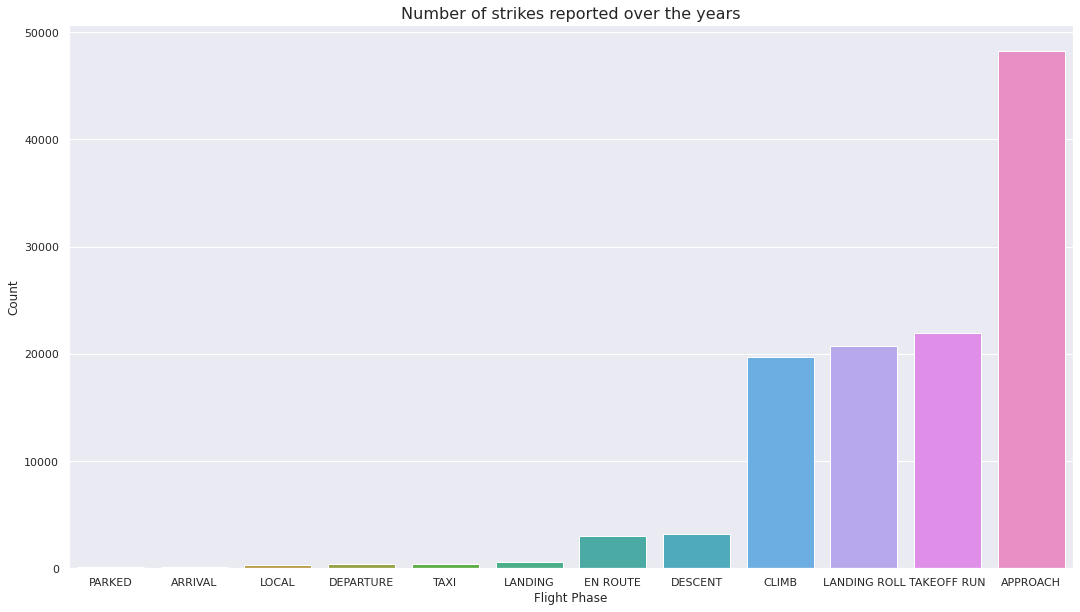

In [11]:
# Drop nulls
flightPhases = df[['Record ID', 'Flight Phase']].dropna().groupby('Flight Phase').agg({'Record ID': 'count'}).reset_index().rename(columns={'Record ID': 'Count'}).sort_values('Count')
sns.barplot(data=flightPhases, x='Flight Phase', y='Count')
plt.title('Number of strikes reported over the years')
plt.show()

According to the figure below from [Flight Loads Analysis of Business Jets](https://www.researchgate.net/publication/315113895_Flight_Loads_Analysis_of_Business_Jets) from [Kamran Rokhsaz](https://www.researchgate.net/profile/Kamran-Rokhsaz) and [Linda K. Kliment](https://www.researchgate.net/scientific-contributions/Linda-K-Kliment-2009566973), we can conclude that most strikes happen next to the landing stages, while it's uncommon for strikes to happen when the plane is on the ground.

*Note: Cruise and En route are different names to the same flight phase.* 

![](https://i.imgur.com/oRxoroQ.png)

### Which States suffer more with Wildlife Aircraft Strikes?

In [12]:
states_data = df[['State', 'Record ID']].groupby('State').count().reset_index().rename(columns={'Record ID': 'Count'})
fig = px.choropleth(states_data,
                    locations='State', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='Count',
                    color_continuous_scale="Burg",
                    title='Number of Aircraft Strikes for each state')
fig.update_layout(autosize=False, width=800, height=600)
fig.update_layout(title_x = 0.5, font_size=18)
        
fig.show()